In [12]:
using Plots, ComplexPhasePortrait, ApproxFun, SingularIntegralEquations, DifferentialEquations
gr();

# M3M6: Methods of Mathematical Physics

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\E{{\rm e}}
\def\dx{\D x}
\def\dt{\D t}
\def\dz{\D z}
\def\C{{\mathbb C}}
\def\R{{\mathbb R}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qqfor{\qquad\hbox{for}\qquad}
\def\qqwhere{\qquad\hbox{where}\qquad}
\def\Res_#1{\underset{#1}{\rm Res}}\,
\def\sech{{\rm sech}\,}
\def\acos{\,{\rm acos}\,}
\def\vc#1{{\mathbf #1}}
\def\ip<#1,#2>{\left\langle#1,#2\right\rangle}
\def\norm#1{\left\|#1\right\|}
\def\half{{1 \over 2}}
$$

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk

<br>
Website: https://github.com/dlfivefifty/M3M6LectureNotes


# Lecture 16: Solving differential equations with orthogonal polynomials


This lecture we do the following:

1. Recurrence relationships for Chebyshev and ultrashperical polynomials
    - Conversion
    - Three-term recurrence and Jacobi operators
2. Application: solving differential equations
    - First order constant coefficients differential equations
    - Second order constant coefficient differential equations with boundary conditions
    - Non-constant coefficients
    


That is, we introduce recurrences related to ultraspherical polynomials. This allows us to represent general linear differential equations as almost-banded systems.

## Recurrence relationships for Chebyshev and ultraspherical polynomials


We have discussed general properties, but now we want to discuss some classical orthogonal polynomials, beginning with Chebyshev (first kind) $T_n(x)$, which is orthogonal w.r.t.
$$1\over \sqrt{1-x^2}$$
and ultraspherical $C_n^{(\lambda)}(x)$, which is orthogonal w.r.t.
$$(1-x^2)^{\lambda - \half}$$
for $\lambda > 0$. Note that Chebyshev (second kind) satisfies $U_n(x) = C_n^{(1)}(x)$.

For Chebyshev, recall we have the normalization constant (here we use a superscript $T_n(x) = k_n^{\rm T} x^n + O(x^{n-1})$)
$$
k_0^{\rm T} = 1, k_n^{\rm T} = 2^{n-1}
$$
For Ultraspherical $C_n^{(\lambda)}$, this is
$$
k_n^{(\lambda)} = {2^n (\lambda)_n \over n!} = {2^n \lambda (\lambda+1) (\lambda+2) \cdots (\lambda+n-1)  \over n!}
$$
where $(\lambda)_n$ is the Pochhammer symbol. Note for $U_n(x) = C_n^{(1)}(x)$ this simplifies to $k_n^{\rm U} = k_n^{(1)} = 2^n$.

We have  already found the recurrence for Chebyshev:
$$
x T_n(x) = {T_{n-1}(x) \over 2} +  {T_{n+1}(x) \over 2}
$$
We will show that we can use this to find the recurrence for _all_ ultraspherical polynomials. But first we need some special recurrences.

**Remark** Jacobi, Laguerre, and Hermite all have similar relationships, which will be discussed further in the problem sheet.

### Derivatives

It turns out that the derivative of $T_n(x)$ is precisely a multiple of  $U_{n-1}(x)$, and similarly the derivative of $C_n^{(\lambda)}$ is a multiple of $C_{n-1}^{(\lambda+1)}$.

**Proposition (Chebyshev derivative)** $$T_n'(x) = n U_{n-1}(x)$$

**Proof** 
We first show that $T_n'(x)$ is othogonal w.r.t. $\sqrt{1-x^2}$ to all  polynomials of degree $m < n-1$, denoted $f_m$, using integration by parts:
$$
\ip<T_n',f_m>_{\rm U} = \int_{-1}^1 T_n'(x) f_m(x) \sqrt{1-x^2} \dx = -\int_{-1}^1 T_n(x) (f_m'(x)(1-x^2) + xf_m) {1  \over \sqrt{1-x^2}} \dx  = - \ip<T_n, f_m'(1-x^2) + x f_m >_{\rm T}  = 0
$$
since $f_m'(1-x^2) + f_m $ is degree $m-1 +2 = m+1 < n$.

The constant works out since
$$
T_n'(x) = {\D \over \dx} (2^{n-1} x^n)  + O(x^{n-2}) = n 2^{n-1} x^{n-1} + O(x^{n-2})
$$
⬛️

The exact same proof shows the following:

**Proposition (Ultraspherical derivative)** 
$${\D \over \dx} C_n^{(\lambda)}(x) = 2 \lambda  C_{n-1}^{(\lambda+1)}(x)$$

Like the three-term recurrence and Jacobi operators, it is useful to express this in matrix form. That is, for the derivatives of $T_n(x)$ we get
$$
{\D \over \dx}  \begin{pmatrix} T_0(x) \\ T_1(x) \\ T_2(x) \\ \vdots \end{pmatrix}= \begin{pmatrix}
0 \cr
1 \cr 
& 2 \cr
&& 3 \cr
&&&\ddots 
\end{pmatrix} \begin{pmatrix} U_0(x) \\ U_1(x) \\ U_2(x) \\ \vdots \end{pmatrix} 
$$
which let's us know that, for 
$$
f(x) = (T_0(x),T_1(x),\ldots) \begin{pmatrix} f_0\\f_1\\\vdots \end{pmatrix}
$$
we have a derivative operator in coefficient space as
$$
f'(x) = (U_0(x),U_1(x),\ldots)\begin{pmatrix}
0 & 1 \cr 
&& 2 \cr
&&& 3 \cr
&&&&\ddots 
\end{pmatrix}  \begin{pmatrix} f_0\\f_1\\\vdots \end{pmatrix}
$$

_Demonstration_ Here we see that applying a matrix to a vector of coefficients successfully calculates the derivative:

In [13]:
f = Fun(x -> cos(x^2), Chebyshev())   # f is expanded in Chebyshev coefficients
n = ncoefficients(f)   # This is the number of coefficients
D = zeros(n-1,n)
for k=1:n-1
    D[k,k+1] = k
end
D

31×32 Array{Float64,2}:
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
 0.0  0.0  2.0  0.0  0.0  0.0  0.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0  0.0  0.0  3.0  0.0  0.0  0.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0  0.0  0.0  0.0  4.0  0.0  0.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0  0.0  0.0  0.0  0.0  5.0  0.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  6.0  …   0.0   0.0   0.0   0.0   0.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0   0.0   0.0   0.0   0.0   0.0
 ⋮            

Here `D*f.coefficients` gives the vector of coefficients corresponding to the derivative, but now the coefficients are in the $U_n(x)$ basis, that is, `Ultraspherical(1)`:

In [14]:
fp = Fun(Ultraspherical(1), D*f.coefficients)

fp(0.1)

-0.001999966666833569

Indeed, it matches the "true" derivative:

In [15]:
f'(0.1)

-0.0019999666668335634

In [16]:
-2*0.1*sin(0.1^2)

-0.0019999666668333335

Note that in ApproxFun.jl we can construct these operators rather nicely:

In [17]:
D = Derivative()
(D*f)(0.1)

-0.001999966666833569

Here we see that we can write produce the ∞-dimensional version as follows:

In [18]:
D : Chebyshev() → Ultraspherical(1) 

ConcreteDerivative : Chebyshev() → Ultraspherical(1)
 ⋅  1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   ⋅
 ⋅   ⋅   2.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   ⋅
 ⋅   ⋅    ⋅   3.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   ⋅
 ⋅   ⋅    ⋅    ⋅   4.0   ⋅    ⋅    ⋅    ⋅    ⋅   ⋅
 ⋅   ⋅    ⋅    ⋅    ⋅   5.0   ⋅    ⋅    ⋅    ⋅   ⋅
 ⋅   ⋅    ⋅    ⋅    ⋅    ⋅   6.0   ⋅    ⋅    ⋅   ⋅
 ⋅   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   7.0   ⋅    ⋅   ⋅
 ⋅   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   8.0   ⋅   ⋅
 ⋅   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   9.0  ⋅
 ⋅   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   ⋱
 ⋅   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   ⋱

### Conversion



We can convert between any two polynomial bases using a lower triangular operator, because their span's are equivalent. In the case of Chebyshev and ultraspherical polynomials, they have the added property that they are banded.

**Proposition (Chebyshev T-to-U conversion)** 
\begin{align*}
 T_0(x) &= U_0(x) \\
 T_1(x) &= {U_1(x) \over 2} \\
 T_n(x) &= {U_n(x) \over 2} - {U_{n-2}(x) \over 2}
\end{align*}

**Proof** 

Before we do the proof, note that the fact that there are limited non-zero entries follows immediately: if $m < n-2$ we have
$$
\ip<T_n, U_m>_{\rm U} = \ip<T_n, (1-x^2)U_m>_{\rm T} = 0
$$

To actually determine the entries, we use the trigonometric formulae. Recall for $x = (z + z^{-1})/2$, $z = \E^{\I \theta}$, we have
\begin{align*}
T_n(x) &= \cos n \theta = {z^{-n} + z^n \over 2}\\
U_n(x) &= {\sin (n+1) \theta \over \sin \theta} = {z^{n+1} - z^{-n-1} \over z - z^{-1}} = z^{-n} + z^{2-n} + \cdots +  \cdots + z^{n-2} + z^n 
\end{align*}
The result follows immediately.

⬛️

**Corollary (Ultrapherical λ-to-(λ+1) conversion)**
$$
C_n^{(\lambda)}(x) = {\lambda \over n+ \lambda} (C_n^{(\lambda+1)}(x) - C_{n-2}^{(\lambda+1)}(x))
$$

**Proof** This follows from differentiating the previous result. For example:
\begin{align*}
 {\D\over \dx} T_0(x) &= {\D\over \dx} U_0(x) \\
 {\D\over \dx} T_1(x) &= {\D\over \dx} {U_1(x) \over 2} \\
{\D\over \dx} T_n(x) &= {\D\over \dx} \left({U_n(x) \over 2} - {U_{n-2} \over 2} \right)
\end{align*}
becomes
\begin{align*}
    0 &= 0\\
    U_0(x) &= C_1^{(2)}(x) \\
   n U_{n-1}(x) &= C_{n-1}^{(2)}(x)  - C_{n-3}^{(2)}(x)
\end{align*}

Differentiating this repeatedly completes the proof.

⬛️


Note we can write this in matrix form, for example, we have
$$
\underbrace{\begin{pmatrix}1 \cr
                    0 & \half\cr
                       -\half & 0 & \half \cr
                           &\ddots &\ddots & \ddots\end{pmatrix} }_{S_0^\top} \begin{pmatrix} 
                           U_0(x) \\ U_1(x) \\ U_2(x) \\ \vdots \end{pmatrix}  =  \begin{pmatrix} T_0(x) \\ T_1(x) \\ T_2(x) \\ \vdots \end{pmatrix}
$$

therefore,
$$
f(x) =  (T_0(x),T_1(x),\ldots) \begin{pmatrix} f_0\\f_1\\\vdots \end{pmatrix} =  (U_0(x),U_1(x),\ldots) S_0 \begin{pmatrix} f_0\\f_1\\\vdots \end{pmatrix}
$$

Again, we can construct this nicely in ApproxFun:

In [19]:
S₀ = I : Chebyshev() → Ultraspherical(1)

ConcreteConversion : Chebyshev() → Ultraspherical(1)
 1.0  0.0  -0.5    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   ⋅
  ⋅   0.5   0.0  -0.5    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   ⋅
  ⋅    ⋅    0.5   0.0  -0.5    ⋅     ⋅     ⋅     ⋅     ⋅   ⋅
  ⋅    ⋅     ⋅    0.5   0.0  -0.5    ⋅     ⋅     ⋅     ⋅   ⋅
  ⋅    ⋅     ⋅     ⋅    0.5   0.0  -0.5    ⋅     ⋅     ⋅   ⋅
  ⋅    ⋅     ⋅     ⋅     ⋅    0.5   0.0  -0.5    ⋅     ⋅   ⋅
  ⋅    ⋅     ⋅     ⋅     ⋅     ⋅    0.5   0.0  -0.5    ⋅   ⋅
  ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    0.5   0.0  -0.5  ⋅
  ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    0.5   0.0  ⋱
  ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    0.5  ⋱
  ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   ⋱

In [20]:
f = Fun(exp, Chebyshev())
g = S₀*f

Fun(Ultraspherical(1),[1.13032, 0.542991, 0.133011, 0.021897, 0.00271463, 0.000269864, 2.23891e-5, 1.5937e-6, 9.93309e-8, 5.5059e-9, 2.74775e-10, 1.24699e-11, 5.19555e-13, 1.99485e-14])

In [21]:
g(0.1) - exp(0.1)

0.0

### Ultraspherical Three-term recurrence 

**Theorem (three-term recurrence for Chebyshev U)** 
\begin{align*}
x U_0(x) &= {U_1(x) \over 2} \\
x U_n(x) &= {U_{n-1}(x) \over 2} + {U_{n+1}(x) \over 2}
\end{align*}

**Proof**
Differentiating
\begin{align*}
 x T_0(x) &= T_1(x) \\
x T_n(x)  &=  {T_{n-1}(x) \over 2} + {T_{n+1}(x) \over 2}
\end{align*}
we get
\begin{align*}
  T_0(x) &= U_0(x) \\
 T_n(x) + n x U_{n-1}(x)  &=  {(n-1) U_{n-2}(x) \over 2} + {(n+1) U_n(x) \over 2}
\end{align*}
substituting in the conversion $T_n(x) = (U_n(x) - U_{n-2}(x))/2$ we get
\begin{align*}
  T_0(x) &= U_0(x) \\
 n x U_{n-1}(x)  &=  {(n-1) U_{n-2}(x) \over 2} + {(n+1) U_n(x) \over 2} - (U_n(x) - U_{n-2}(x))/2 = {n U_{n-2}(x) \over 2} + {n U_n(x) \over 2}
\end{align*}

⬛️

Differentiating this theorem again and applying the conversion we get the following

**Corollary (three-term recurrence for ultrashperical)** 
\begin{align*}
x C_0^{(\lambda)}(x) &= {1 \over 2\lambda } C_1^{(\lambda)}(x) \\
 x C_n^{(\lambda)}(x) &=  {n+2\lambda-1 \over 2(n+\lambda)} C_{n-1}^{(\lambda)}(x) + {n+1 \over 2(n+\lambda)} C_{n+1}^{(\lambda)}(x) 
\end{align*}


Here's an example of the Jacobi operator (which is the transpose of the multiplciation by $x$ operator):

In [22]:
Multiplication(Fun(), Ultraspherical(2))'

TransposeOperator : Ultraspherical(2) → Ultraspherical(2)
 0.0                 0.25   …   ⋅       ⋅                   ⋅    ⋅
 0.6666666666666666  0.0        ⋅       ⋅                   ⋅    ⋅
  ⋅                  0.625      ⋅       ⋅                   ⋅    ⋅
  ⋅                   ⋅         ⋅       ⋅                   ⋅    ⋅
  ⋅                   ⋅         ⋅       ⋅                   ⋅    ⋅
  ⋅                   ⋅     …   ⋅       ⋅                   ⋅    ⋅
  ⋅                   ⋅        0.4375   ⋅                   ⋅    ⋅
  ⋅                   ⋅        0.0     0.4444444444444444   ⋅    ⋅
  ⋅                   ⋅        0.55    0.0                 0.45  ⋅
  ⋅                   ⋅         ⋅      0.5454545454545454  0.0   ⋱
  ⋅                   ⋅     …   ⋅       ⋅                   ⋱    ⋱

## Application: solving differential equations

The preceding results allowed us to represent 

1. Differentiation
2. Conversion
3. Multiplication

as banded operators. We will see that we can combine these, along with 

4\. Evaluation

to solve ordinary differential equations.

### First order, constant coefficient differential equations

Consider the simplest ODE:
\begin{align*}
u(0) &= 0 \\
u'(x) - u(x) &= 0 
\end{align*}
and suppose  represent $u(x)$ in its Chebyshev expansion, with to be determined coefficents. In other words, we want to calculate coefficients $u_k$ such that
$$
u(x) = \sum_{k=0}^\infty u_k T_k(x) = (T_0(x), T_1(x), \ldots) \begin{pmatrix} u_0 \\ u_1 \\ \vdots \end{pmatrix}
$$
In this case we know that $u(x) = \E^x$, but we would still need other means to calculate $u_k$ (They are definitely not as simple as Taylor series coefficients).

We can express the constraints as acting on the coefficients. For example, we have
$$
u(0) = (T_0(0), T_1(0), \ldots) \begin{pmatrix} u_0\\u_1\\\vdots \end{pmatrix} = (1,0,-1,0,1,\ldots)  \begin{pmatrix} u_0\\u_1\\\vdots \end{pmatrix} 
$$
We also have 
$$u'(x) = (U_0(x),U_1(x),\ldots) \begin{pmatrix}
0 & 1 \cr 
&& 2 \cr
&&& 3 \cr
&&&&\ddots 
\end{pmatrix}\begin{pmatrix} u_0\\u_1\\\vdots \end{pmatrix} 
$$
To represent $u'(x) - u(x)$, we need to make sure the bases are compatible. In other words, we want to express $u(x)$ in it's $U_k(x)$ basis using the conversion operator $S_0$:
$$u(x) = (U_0(x),U_1(x),\ldots) \begin{pmatrix}
    1 &0 & -\half \cr 
& \half & 0 & -\half \cr
&&\ddots & \ddots & \ddots
\end{pmatrix}\begin{pmatrix} u_0\\u_1\\\vdots \end{pmatrix} 
$$

Which gives us, 
$$
u'(x) - u(x) =  (U_0(x),U_1(x),\ldots)  \begin{pmatrix}
    -1 &1 & \half \cr 
& -\half & 2 & \half \cr
&& -\half & 3 & \half \cr
&&&\ddots & \ddots & \ddots
\end{pmatrix} \begin{pmatrix} u_0\\u_1\\\vdots \end{pmatrix} 
$$


Combing the differential part and the evaluation part, we arrive at an (infinite) system of equations for the coefficients $u_0,u_1,\dots$:
$$
\begin{pmatrix}
      1 & 0 & -1 & 0 & 1 & \cdots \\
    -1 &1 & \half \cr 
& -\half & 2 & \half \cr
&& -\half & 3 & \half \cr
&&&\ddots & \ddots & \ddots
\end{pmatrix} \begin{pmatrix} u_0\\u_1\\\vdots \end{pmatrix}  = \begin{pmatrix} 1 \\ 0 \\ 0 \\ \vdots \end{pmatrix}
$$

How to solve this system is outside the scope of this course (though a simple approach is to truncate the infinite system to finite systems). We can however do this in ApproxFun:

In [23]:
B  = Evaluation(0.0) : Chebyshev()
D  = Derivative() : Chebyshev() → Ultraspherical(1)
S₀ = I : Chebyshev() → Ultraspherical(1)
L = [B; 
     D - S₀]

InterlaceOperator : Chebyshev() → 2-element ArraySpace:
Space{D,Float64} where D[ConstantSpace(Point(0.0)), Ultraspherical(1)]
  1.0   0.0  -1.0   0.0   1.0   0.0  -1.0   0.0   1.0  0.0  ⋯
 -1.0   1.0   0.5   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ⋱
  0.0  -0.5   2.0   0.5   0.0   0.0   0.0   0.0   0.0  0.0  ⋱
  0.0   0.0  -0.5   3.0   0.5   0.0   0.0   0.0   0.0  0.0  ⋱
  0.0   0.0   0.0  -0.5   4.0   0.5   0.0   0.0   0.0  0.0  ⋱
  0.0   0.0   0.0   0.0  -0.5   5.0   0.5   0.0   0.0  0.0  ⋱
  0.0   0.0   0.0   0.0   0.0  -0.5   6.0   0.5   0.0  0.0  ⋱
  0.0   0.0   0.0   0.0   0.0   0.0  -0.5   7.0   0.5  0.0  ⋱
  0.0   0.0   0.0   0.0   0.0   0.0   0.0  -0.5   8.0  0.5  ⋱
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -0.5  9.0  ⋱
   ⋮     ⋱     ⋱     ⋱     ⋱     ⋱     ⋱     ⋱     ⋱    ⋱   ⋱

We can solve this system as follows:

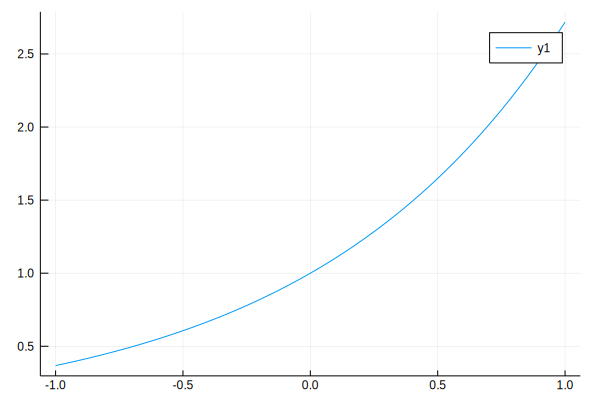

In [25]:
u = L \ [1; 0]
plot(u)

It matches the "true" result:

In [26]:
u(0.1) - exp(0.1)

-4.440892098500626e-16

Note we can incorporate right-hand sides as well, for example, to solve $u'(x) - u(x) = f(x)$, by expanding $f$ in its Chebyshev U series.

### Second-order constanst coefficient equations

This approach extends to second-order constant-coefficient equations by using ultraspherical polynomials.  Consider
\begin{align*}
u(-1) &= 1\\
u(1) &= 0\\
u''(x) + u'(x)  + u(x) &= 0
\end{align*}
Evaluation works as in the first-order case. To handle second-derivatives, we need $C^{(2)}$ polynomials:

In [27]:
D₀ = Derivative() : Chebyshev() → Ultraspherical(1)
D₁ = Derivative() : Ultraspherical(1) → Ultraspherical(2)
D₁*D₀  # 2 zeros not printed in (1,1) and (1,2) entry

ConcreteDerivative : Chebyshev() → Ultraspherical(2)
 ⋅  ⋅  4.0   ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   ⋅
 ⋅  ⋅   ⋅   6.0   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   ⋅
 ⋅  ⋅   ⋅    ⋅   8.0    ⋅     ⋅     ⋅     ⋅     ⋅   ⋅
 ⋅  ⋅   ⋅    ⋅    ⋅   10.0    ⋅     ⋅     ⋅     ⋅   ⋅
 ⋅  ⋅   ⋅    ⋅    ⋅     ⋅   12.0    ⋅     ⋅     ⋅   ⋅
 ⋅  ⋅   ⋅    ⋅    ⋅     ⋅     ⋅   14.0    ⋅     ⋅   ⋅
 ⋅  ⋅   ⋅    ⋅    ⋅     ⋅     ⋅     ⋅   16.0    ⋅   ⋅
 ⋅  ⋅   ⋅    ⋅    ⋅     ⋅     ⋅     ⋅     ⋅   18.0  ⋅
 ⋅  ⋅   ⋅    ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   ⋱
 ⋅  ⋅   ⋅    ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   ⋱
 ⋅  ⋅   ⋅    ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   ⋱

For the identity operator, we use two conversion operators:

In [28]:
S₀ = I : Chebyshev() → Ultraspherical(1)
S₁ = I : Ultraspherical(1) → Ultraspherical(2)
S₁*S₀

ConversionWrapper : Chebyshev() → Ultraspherical(2)
 1.0  0.0   -0.6666666666666666    0.0    …    ⋅                     ⋅      ⋅
  ⋅   0.25   0.0                  -0.375       ⋅                     ⋅      ⋅
  ⋅    ⋅     0.16666666666666666   0.0         ⋅                     ⋅      ⋅
  ⋅    ⋅      ⋅                    0.125       ⋅                     ⋅      ⋅
  ⋅    ⋅      ⋅                     ⋅         0.07142857142857142    ⋅      ⋅
  ⋅    ⋅      ⋅                     ⋅     …   0.0                   0.0625  ⋅
  ⋅    ⋅      ⋅                     ⋅        -0.12698412698412698   0.0     ⋱
  ⋅    ⋅      ⋅                     ⋅         0.0                  -0.1125  ⋱
  ⋅    ⋅      ⋅                     ⋅         0.05555555555555555   0.0     ⋱
  ⋅    ⋅      ⋅                     ⋅          ⋅                    0.05    ⋱
  ⋅    ⋅      ⋅                     ⋅     …    ⋅                     ⋅      ⋱

And for the first derivative, we use a derivative and then a conversion:

In [29]:
S₁*D₀  # or could have been D₁*S₀

TimesOperator : Chebyshev() → Ultraspherical(2)
 ⋅  1.0  0.0  -1.0    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   ⋅
 ⋅   ⋅   1.0   0.0  -1.0    ⋅     ⋅     ⋅     ⋅     ⋅   ⋅
 ⋅   ⋅    ⋅    1.0   0.0  -1.0    ⋅     ⋅     ⋅     ⋅   ⋅
 ⋅   ⋅    ⋅     ⋅    1.0   0.0  -1.0    ⋅     ⋅     ⋅   ⋅
 ⋅   ⋅    ⋅     ⋅     ⋅    1.0   0.0  -1.0    ⋅     ⋅   ⋅
 ⋅   ⋅    ⋅     ⋅     ⋅     ⋅    1.0   0.0  -1.0    ⋅   ⋅
 ⋅   ⋅    ⋅     ⋅     ⋅     ⋅     ⋅    1.0   0.0  -1.0  ⋅
 ⋅   ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    1.0   0.0  ⋱
 ⋅   ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅    1.0  ⋱
 ⋅   ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   ⋱
 ⋅   ⋅    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   ⋱

Putting everything together we get:

In [30]:
B₋₁ = Evaluation(-1) : Chebyshev()
B₁ = Evaluation(1) : Chebyshev()
# u(-1) 
# u(1)
# u'' + u' +u

L = [B₋₁; 
     B₁; 
     D₁*D₀ + S₁*D₀ + S₁*S₀]

InterlaceOperator : Chebyshev() → 3-element ArraySpace:
Space{D,Float64} where D[ConstantSpace(Point(-1)), ConstantSpace(Point(1)), Ultraspherical(2)]
 1.0  -1.0   1.0                  -1.0    …   1.0                  -1.0     ⋯
 1.0   1.0   1.0                   1.0        1.0                   1.0     ⋱
 1.0   1.0   3.3333333333333335   -1.0        0.0                   0.0     ⋱
 0.0   0.25  1.0                   5.625      0.0                   0.0     ⋱
 0.0   0.0   0.16666666666666666   1.0        0.0                   0.0     ⋱
 0.0   0.0   0.0                   0.125  …   0.0                   0.0     ⋱
 0.0   0.0   0.0                   0.0        0.07142857142857142   0.0     ⋱
 0.0   0.0   0.0                   0.0       -1.0                   0.0625  ⋱
 0.0   0.0   0.0                   0.0       15.873015873015873    -1.0     ⋱
 0.0   0.0   0.0                   0.0        1.0                  17.8875  ⋱
  ⋮     ⋱     ⋱                     ⋱     …    ⋱                     

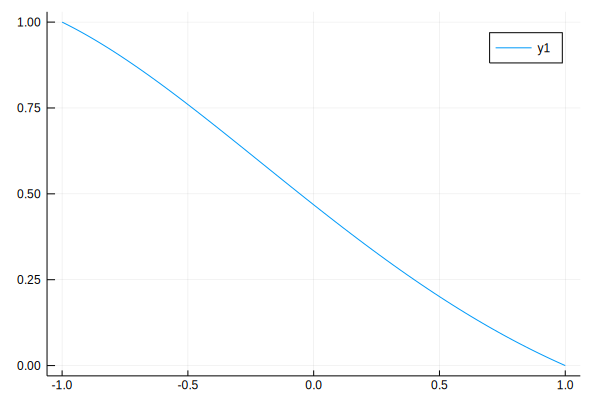

In [31]:
u = L \ [1.0,0.0,0.0]
plot(u)

### Variable coefficients

Consider the Airy ODE 
\begin{align*}
u(-1) &= 1\\
u(1) &= 0\\
u''(x) - xu(x) &= 0
\end{align*}

to handle, this, we need only use the Jacobi operator to represent multiplication by $x$:

In [32]:
x = Fun()
Jᵗ = Multiplication(x) : Chebyshev() → Chebyshev()  # transpose of the Jacobi operator

ConcreteMultiplication : Chebyshev() → Chebyshev()
 0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   ⋅
 1.0  0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   ⋅
  ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   ⋅
  ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅   ⋅
  ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅   ⋅
  ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅   ⋅
  ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅   ⋅
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅   ⋅
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5  ⋅
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  ⋱
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋱   ⋱

We set op ther system as follows:

In [33]:
L = [B₋₁;   # u(-1)
     B₁ ;   # u(1)
     D₁*D₀ - S₁*S₀*Jᵗ]   # u'' - x*u

InterlaceOperator : Chebyshev() → 3-element ArraySpace:
Space{D,Float64} where D[ConstantSpace(Point(-1)), ConstantSpace(Point(1)), Ultraspherical(2)]
  1.0   -1.0                   1.0     -1.0   …  -1.0                  ⋯
  1.0    1.0                   1.0      1.0       1.0                  ⋱
  0.0   -0.16666666666666669   4.0      0.25      0.0                  ⋱
 -0.25   0.0                   0.0625   6.0       0.0                  ⋱
  0.0   -0.08333333333333333   0.0      0.05      0.0                  ⋱
  0.0    0.0                  -0.0625   0.0   …   0.0                  ⋱
  0.0    0.0                   0.0     -0.05     -0.03571428571428571  ⋱
  0.0    0.0                   0.0      0.0       0.0                  ⋱
  0.0    0.0                   0.0      0.0       0.03571428571428571  ⋱
  0.0    0.0                   0.0      0.0      18.0                  ⋱
   ⋮      ⋱                     ⋱        ⋱    …    ⋱                   ⋱

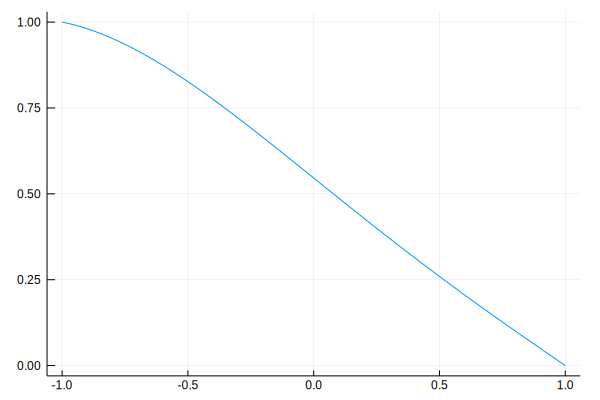

In [34]:
u = L \ [1.0;0.0;0.0]
plot(u; legend=false)

If we introduce a small parameter, that is, solve
\begin{align*}
u(-1) &= 1\\
u(1) &= 0\\
\epsilon u''(x) - xu(x) &= 0
\end{align*}
we can see pretty hard to compute solutions:

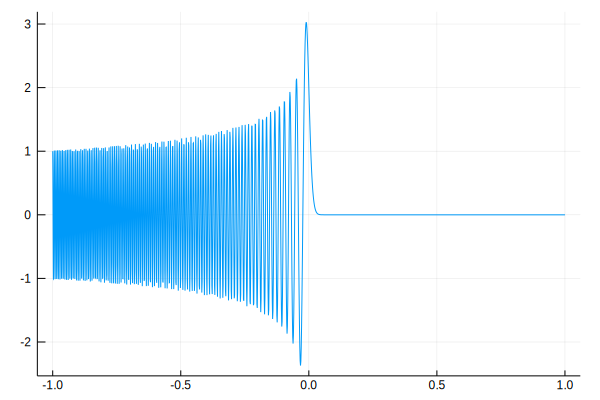

In [35]:
ε = 1E-6
L = [B₋₁; 
     B₁ ; 
     ε*D₁*D₀ - S₁*S₀*Jᵗ]

u = L \ [1.0;0.0;0.0]
plot(u; legend=false)

Because of the banded structure, this can be solved fast:

In [37]:
ε = 1E-10
L = [B₋₁; 
     B₁ ; 
     ε*D₁*D₀ - S₁*S₀*Jᵗ]


@time u = L \ [1.0;0.0;0.0]
@show ncoefficients(u);

  0.466365 seconds (13.06 M allocations: 296.400 MiB, 19.59% gc time)
ncoefficients(u) = 62496


To handle other variable coefficients, first consider a polynomial $p(x)$. If Multiplication by $x$ is represented by multiplying the coefficients by $J^\top$, then multiplication by $p$ is represented by $p(J^\top)$:

In [38]:
M = -I + Jᵗ + (Jᵗ)^2  # represents -1+x+x^2

PlusOperator : Chebyshev() → Chebyshev()
 -0.5   0.5    0.25    ⋅      ⋅      ⋅      ⋅      ⋅      ⋅      ⋅    ⋅
  1.0  -0.25   0.5    0.25    ⋅      ⋅      ⋅      ⋅      ⋅      ⋅    ⋅
  0.5   0.5   -0.5    0.5    0.25    ⋅      ⋅      ⋅      ⋅      ⋅    ⋅
   ⋅    0.25   0.5   -0.5    0.5    0.25    ⋅      ⋅      ⋅      ⋅    ⋅
   ⋅     ⋅     0.25   0.5   -0.5    0.5    0.25    ⋅      ⋅      ⋅    ⋅
   ⋅     ⋅      ⋅     0.25   0.5   -0.5    0.5    0.25    ⋅      ⋅    ⋅
   ⋅     ⋅      ⋅      ⋅     0.25   0.5   -0.5    0.5    0.25    ⋅    ⋅
   ⋅     ⋅      ⋅      ⋅      ⋅     0.25   0.5   -0.5    0.5    0.25  ⋅
   ⋅     ⋅      ⋅      ⋅      ⋅      ⋅     0.25   0.5   -0.5    0.5   ⋱
   ⋅     ⋅      ⋅      ⋅      ⋅      ⋅      ⋅     0.25   0.5   -0.5   ⋱
   ⋅     ⋅      ⋅      ⋅      ⋅      ⋅      ⋅      ⋅      ⋱      ⋱    ⋱

  0.023297 seconds (295.98 k allocations: 7.463 MiB)
ε * ((u')')(0.1) - (-1 + 0.1 + 0.1 ^ 2) * u(0.1) = -1.4863110742169283e-14


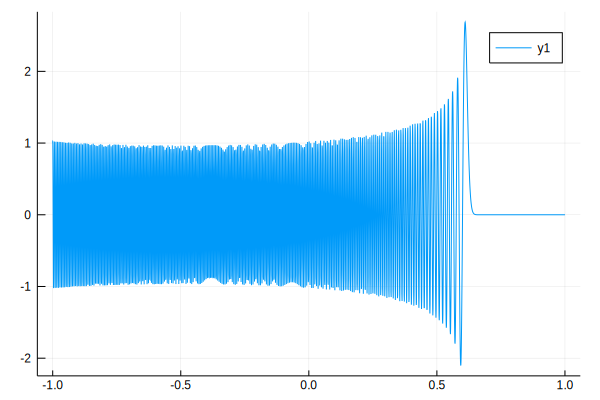

In [39]:
ε = 1E-6
L = [B₋₁; 
     B₁ ; 
     ε*D₁*D₀ - S₁*S₀*M]

@time u = L \ [1.0;0.0;0.0]

@show ε*u''(0.1) - (-1+0.1+0.1^2)*u(0.1)
plot(u)

For other smooth functions, we first approximate in a polynomial basis,  and without loss of generality we use Chebyshev T basis. For example, consider 
\begin{align*}
u(-1) &= 1\\
u(1) &= 0\\
\epsilon u''(x) - \E^x u(x) &= 0
\end{align*}
where
$$
\E^x  \approx p(x) = \sum_{k=0}^{m-1} p_k T_k(x)
$$
Evaluating at a point $x$, recall Clenshaw's algorithm:
\begin{align*}
\gamma_{n-1} &= 2p_{n-1} \\
\gamma_{n-2} &= 2p_{n-2} + 2x \gamma_{n-1} \\
\gamma_{n-3} &= 2 p_{n-3} + 2x \gamma_{n-2} - \gamma_{n-1} \\
& \vdots \\
\gamma_1 &= p_1 + x \gamma_2 - \half \gamma_3 \\
p(x) = \gamma_0 &= p_0 + x \gamma_1 - \half \gamma_2
\end{align*}
If multiplication by $x$ becomes $J^\top$, then multiplication by $p(x)$ becomes $p(J^\top)$, and hence we calculate:\
\begin{align*}
\Gamma_{n-1} &= 2p_{n-1}I \\
\Gamma_{n-2} &= 2p_{n-2}I + 2J^\top \Gamma_{n-1} \\
\Gamma_{n-3} &= 2 p_{n-3}I + 2J^\top \Gamma_{n-2} - \Gamma_{n-1} \\
& \vdots \\
\Gamma_1 &= p_1I + J^\top \Gamma_2 - \half \Gamma_3 \\
p(J^\top) = \Gamma_0 &= p_0 + x \Gamma_1 - \half \Gamma_2
\end{align*}

Here is an example:

In [40]:
p = Fun(exp, Chebyshev()) # polynomial approximation to exp(x)
M = Multiplication(p) : Chebyshev() # constructed using Clenshaw:

ConcreteMultiplication : Chebyshev() → Chebyshev()
 1.2660658777520084     0.5651591039924851      …  5.518385951076946e-9    ⋱
 1.1303182079849703     1.4018135475190467         9.988153506976674e-8    ⋱
 0.27149533953407656    0.587327528916817          1.59923072107804e-6     ⋱
 0.044336849848663804   0.1384847899880851         2.248866199669348e-5    ⋱
 0.0054742404420936785  0.022439888080288854       0.00027146315597690023  ⋱
 0.0005429263119139036  0.0027596088825239777   …  0.0027371202210468393   ⋱
 4.497732295427654e-5   0.00027306237418820746     0.022168424924331902    ⋱
 3.198436462511398e-6   2.2588267717379123e-5      0.13574766976703828     ⋱
 1.992124804817033e-7   1.6047366172067758e-6      0.5651591039924851      ⋱
 1.1036771902153892e-8  9.988153506976674e-8       1.2660658777520084      ⋱
  ⋱                      ⋱                      …   ⋱                      ⋱

In [41]:
ApproxFun.bandwidths(M) # still banded

(13, 13)

  0.039351 seconds (1.04 M allocations: 21.628 MiB, 28.97% gc time)
ε * ((u')')(0.1) + exp(0.1) * u(0.1) = 4.884981308350689e-15


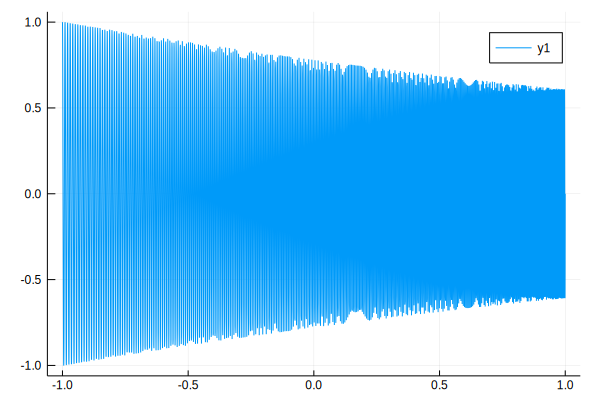

In [42]:
ε = 1E-6
L = [B₋₁; 
     B₁ ; 
     ε*D₁*D₀ + S₁*S₀*M]

@time u = L \ [1.0;0.0;0.0]

@show ε*u''(0.1) + exp(0.1)*u(0.1)
plot(u)